In [66]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


In [67]:
# Load the dfset
file_path = '../data/owid-covid-data.csv'
date_column = 'date'
target_column = 'new_deaths'
df = pd.read_csv(file_path, parse_dates=True)
df = df.drop(columns=['total_deaths','new_deaths_smoothed', 'total_deaths_per_million','new_deaths_per_million','new_deaths_smoothed_per_million'])
df = df.groupby(date_column).sum().reset_index()
date = df[date_column].values
df.set_index(date_column, inplace=True)
df = df.select_dtypes(exclude=['object'])


In [68]:
train = df.iloc[:-30]
test = df.iloc[-30:]

In [69]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


model = LinearRegression().fit(train.drop(columns=[target_column]), train[target_column])

pred = model.predict(test.drop(columns=[target_column]))
print("Mean squared error: %.3f" % mean_squared_error(test[target_column], pred))

print("Coefficient of determination: %.3f" % r2_score(test[target_column], pred))

Mean squared error: 100414220.016
Coefficient of determination: -344.842


c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


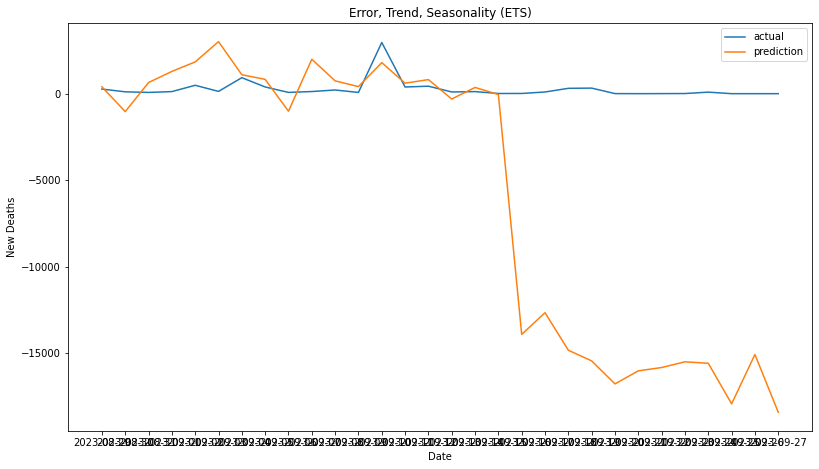

In [70]:
fig, ax = plt.subplots(1,1, figsize=(1280/96, 720/96))
ax.plot(date[-30:],test[target_column].values, label='actual')
ax.plot(date[-30:], pred, label='prediction')
ax.set_title('Error, Trend, Seasonality (ETS)')
ax.set_ylabel('New Deaths')
ax.set_xlabel(date_column)
ax.legend()
plt.show()

In [71]:
from sklearn.metrics import mean_squared_error
from math import sqrt
test[target_column].mean()
rmse=sqrt(mean_squared_error(pred,test[target_column]))
print(rmse)


10020.689597824294
